In [6]:
from sklearn.datasets import make_blobs #自己创建的数据集：生成几个cluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
#生成500个样本，2个特征的数据集 4个中心
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

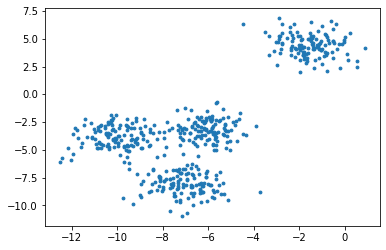

In [5]:
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:,0],X[:,1]
           ,marker='o'  #点的形状
           ,s=8  #点的大小)
           )
plt.show()

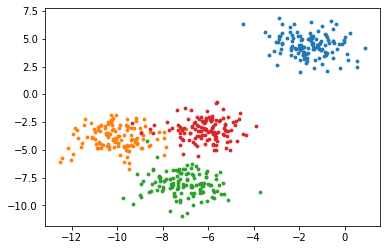

In [10]:
color = ['red','yellow','blue','orange']
fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(X[y==i,0],X[y==i,1]
               ,marker='o'  #点的形状
               ,s=8  #点的大小)
               )
plt.show()

In [9]:
set(y)

{0, 1, 2, 3}

In [11]:
from sklearn.cluster import KMeans
n = 3

# 完成聚类 - 求出质心
cluster = KMeans(n_clusters=n, random_state=0).fit(X)

In [12]:
#重要属性 labels_:查看聚好的类，每个样本所对应的类
y_pred = cluster.labels_
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

KMeans也有predict和fit_predict,表示学习数据X并对X的聚类进行预测
得到的结果和labels_一样

何时使用predict和fit_predict?
当样本量特别大的时候，KMeans计算时间很长
可以先切片一部分fit_predict，再把整个样本样本放进去结果中
cluster_smallsub = KMeans(n_clusters=n, random_state=0).fit(X[:200])
y_pred = cluster_smallsub.predict(X)
有时候可以用较少的数据得到比较类似的质心

In [13]:
# 重要属性cluster_centers_： 查看质心
centroid = cluster.cluster_centers_
centroid

array([[-7.09306648, -8.10994454],
       [-1.54234022,  4.43517599],
       [-8.0862351 , -3.5179868 ]])

In [14]:
centroid.shape

(3, 2)

In [15]:
# 重要属性intertia_:查看总距离的平方和
inertia = cluster.inertia_
inertia

1903.4503741659241

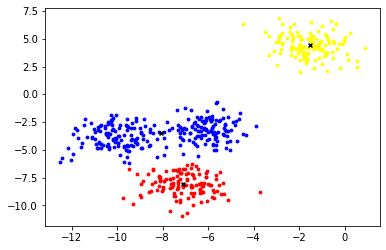

In [17]:
color = ['red','yellow','blue','orange']
fig, ax1 = plt.subplots(1)

for i in range(n):
    ax1.scatter(X[y_pred==i,0],X[y_pred==i,1]
               ,marker='o'  #点的形状
               ,s=8  #点的大小
               ,c=color[i])
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker='x'
           ,s=15
           ,c='black')    

plt.show()

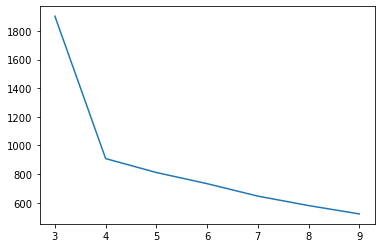

In [22]:
# n_claster越大，inertia就会越小 - inertia不是KMeans的评估指标
iner = []

for i in range(3,10):
    cluster = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia = cluster.inertia_
    iner.append(inertia)
    
plt.plot(range(3,10),iner)
plt.show()

聚类算法的模型评估指标：轮廓系数 - 同时计算组内差距和组间差距
结果在[-1,1]之间
[-1,0]  聚类效果不好
[0.1]  聚类效果好，越接近1越好

sklearn.metrics.silhouette_score：返回一个值，是数据集中所有样本的轮廓系数的均值
sihouette_samples:返回数据集中每个样本的轮廓系数

优缺点：
有点： 对数据分布没有假设，因此在大部分数据集上表现良好
缺点： 在凸型数据上表现虚高，比如基于密度进行的聚类，或通过DBSCAN获得的聚类效果，如果使用轮廓系数来衡量，会表现出比真实聚类效果更高的分数

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [25]:
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [26]:
silhouette_score(X,y_pred)

0.5882004012129721

In [27]:
cluster = KMeans(n_clusters=4, random_state=0).fit(X)
inertia = cluster.inertia_

In [28]:
inertia

908.3855684760603

In [32]:
silhouette_score(X,cluster.labels_) #分4簇结果更好

0.6505186632729437

In [33]:
cluster = KMeans(n_clusters=5, random_state=0).fit(X)
silhouette_score(X,cluster.labels_)

0.5746932321727457

In [37]:
silhouette_samples(X,y_pred).mean() #=silhouette_score(X,y_pred)

0.5882004012129721

当真实标签未知时，其他的模型评估指标：
1. CHI sklearn.metrics.calinski_harabasz_score(X,y_pred) 卡林斯基-哈拉巴斯指数
   越高越好
   数据量很大的时候使用
2. sklearn.metrics.davies_bouldin_score(X,y_pred) 戴维斯-布尔丁指数
3. sklearn.metrics.cluster.contingency_metrix(X.y_pred) 权变矩阵

In [40]:
from sklearn.metrics import calinski_harabasz_score

# 记录时间：时间戳
from time import time
t0 = time()
calinski_harabasz_score(X,y_pred)
time()-t0

0.0009849071502685547

In [41]:
from sklearn.metrics import calinski_harabasz_score

# 记录时间：时间戳
from time import time
t0 = time()
silhouette_score(X,y_pred)
time()-t0

0.006951093673706055

In [42]:
t0

1657512493.2328632

In [43]:
import datetime
datetime.datetime.fromtimestamp(t0).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-11 16:08:13'

选择n_clusters

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colormap

In [25]:
n_clusters = 4

For n_clusters = 4 the average silhouette score is:  0.6505186632729437


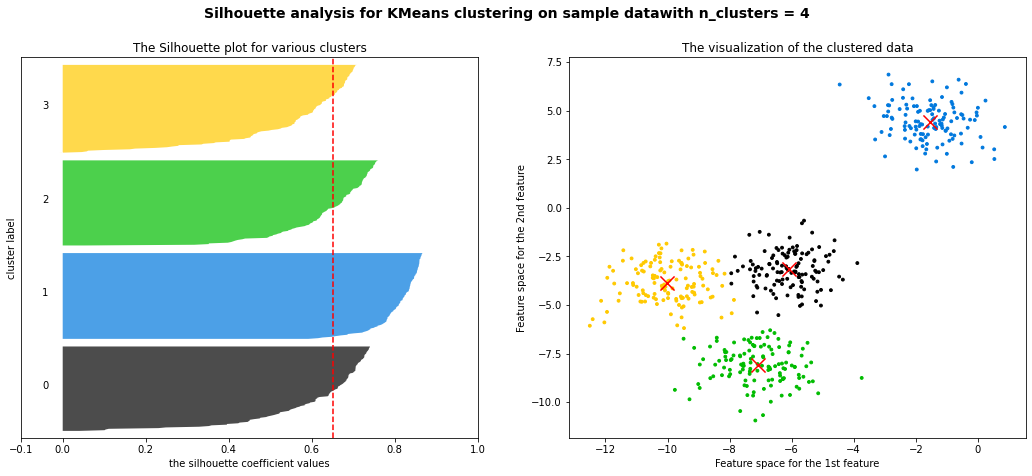

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)

# 第一个图：轮廓系数的图像，是由各个簇的轮廓系数组成的横向条形图
# 横坐标：轮廓系数的数值   纵坐标：每一个样本，一维轮廓系数是对于每一个样本进行计算的

# 轮廓系数是[-1,1]，希望是大于1   所以横坐标需要小一点
ax1.set_xlim([-0.1,1])

# 纵坐标：[0，X.shape[0]]
# 不同簇之间有一定间隔
ax1.set_ylim([0,X.shape[0]+(n_clusters+1)*10])

#开始建模，调用聚类之后的标签
clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
cluster_labels = clusterer.labels_

# 计算轮廓系数
silhouette_avg = silhouette_score(X,cluster_labels)
print("For n_clusters =", n_clusters, 
     "the average silhouette score is: ", silhouette_avg)

# 横坐标：每个样本点的轮廓系数
sample_silhouette_values = silhouette_samples(X,cluster_labels)

# 设定y轴上的初始值
y_lower = 10

# 对每一个簇进行循环
for i in range(n_clusters):
    # 抽取标签相同的簇
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    # 排序
    ith_cluster_silhouette_values.sort()
    # 查看簇中有多少样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    # y轴的上界
    y_upper = y_lower + size_cluster_i
    
    # 颜色：colormap
    # nipy_spectral([输入任意小数来代表颜色])
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    # 开始填充子图1
    # fill_between 是一个让一个范围中的柱状图都统一颜色的函数
    ax1.fill_betweenx(np.arange(y_lower,y_upper)
                     ,ith_cluster_silhouette_values
                     ,facecolor=color
                     ,alpha=0.7
                     )
    
    # 写每个簇的编号
    # text(要实现编号位置的横坐标，纵坐标，要显示的内容)
    ax1.text(-0.05
            ,y_lower+0.5*size_cluster_i
            ,str(i))
    
    # 下一个簇更新y_lower
    y_lower = y_upper + 10
    
# 图1加标题
ax1.set_title('The Silhouette plot for various clusters')
ax1.set_xlabel('the silhouette coefficient values')
ax1.set_ylabel('cluster label')

# 把数据集的轮廓系数的均值以虚线放入图中
ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

# y轴不显示刻度
ax1.set_yticks([])
# x轴刻度
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])


#第二个图
colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)  # 同一个簇，同一种颜色

ax2.scatter(X[:,0],X[:,1]
           ,marker='o'
           ,s=8
           ,c=colors
           )

# 质心
centers = clusterer.cluster_centers_
ax2.scatter(centers[:,0],centers[:,1]
           ,marker='x'
           ,c='red',alpha=1, s=200)

# 图2加标题
ax2.set_title('The visualization of the clustered data')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

# 整个图设置标题
plt.suptitle(('Silhouette analysis for KMeans clustering on sample data'
             "with n_clusters = %d" % n_clusters),
            fontsize=14, fontweight='bold')
plt.show()

For n_clusters = 2 the average silhouette score is:  0.7049787496083262


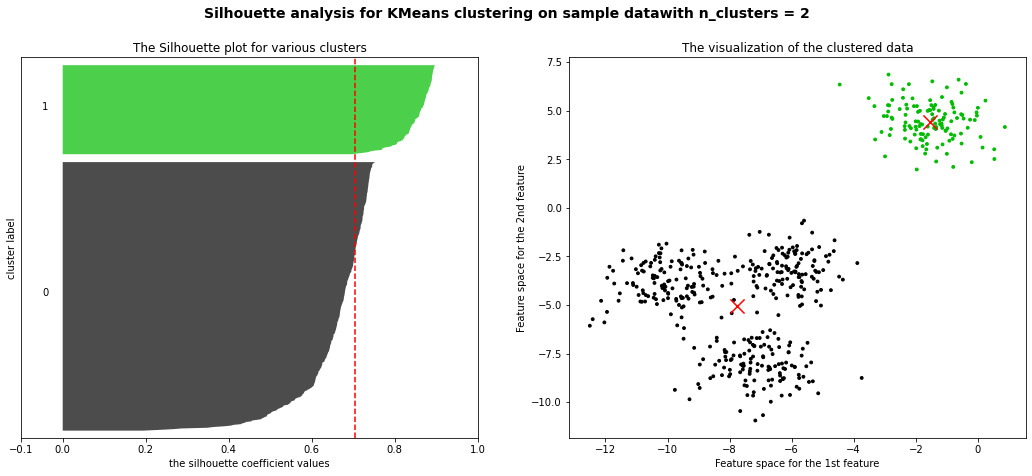

For n_clusters = 3 the average silhouette score is:  0.5882004012129721


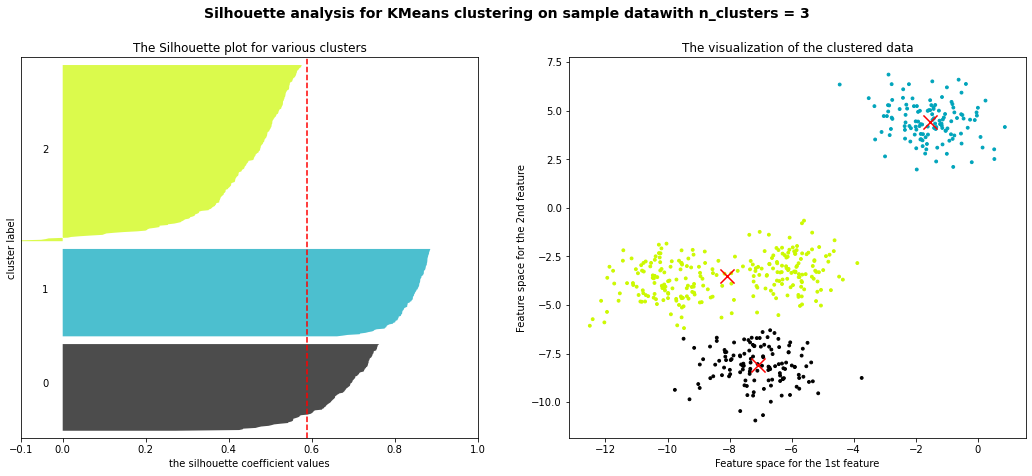

For n_clusters = 4 the average silhouette score is:  0.6505186632729437


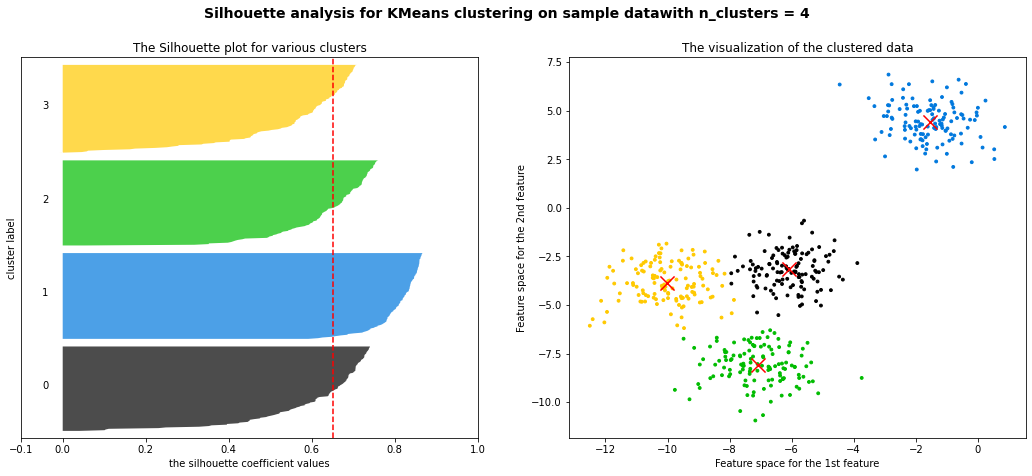

For n_clusters = 5 the average silhouette score is:  0.5746932321727457


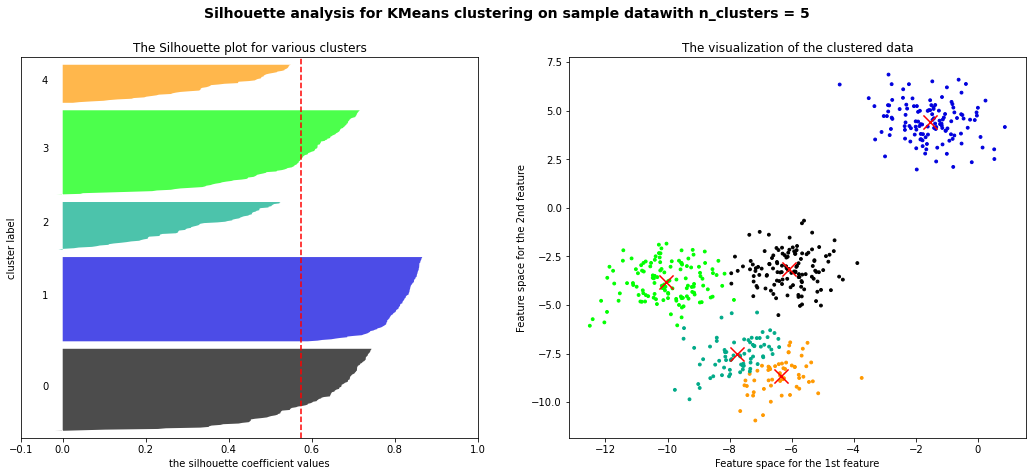

For n_clusters = 6 the average silhouette score is:  0.5150064498560357


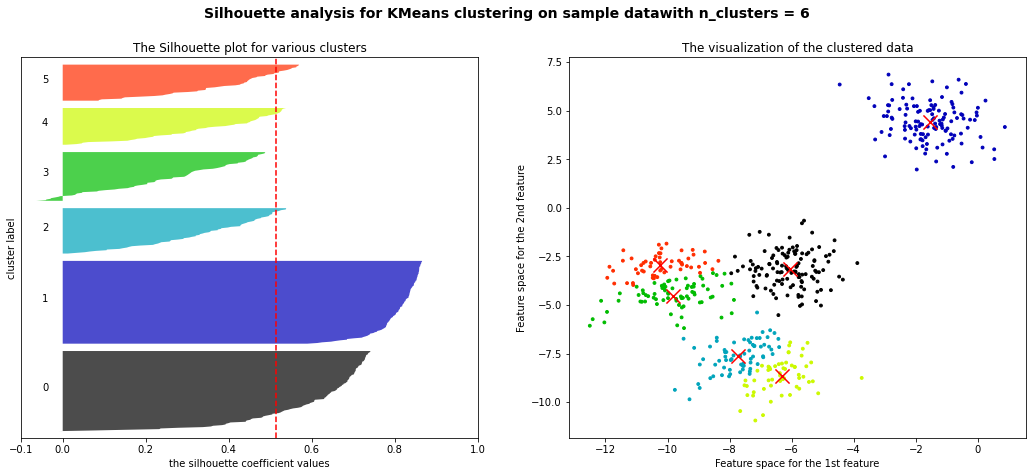

For n_clusters = 7 the average silhouette score is:  0.39188677888839263


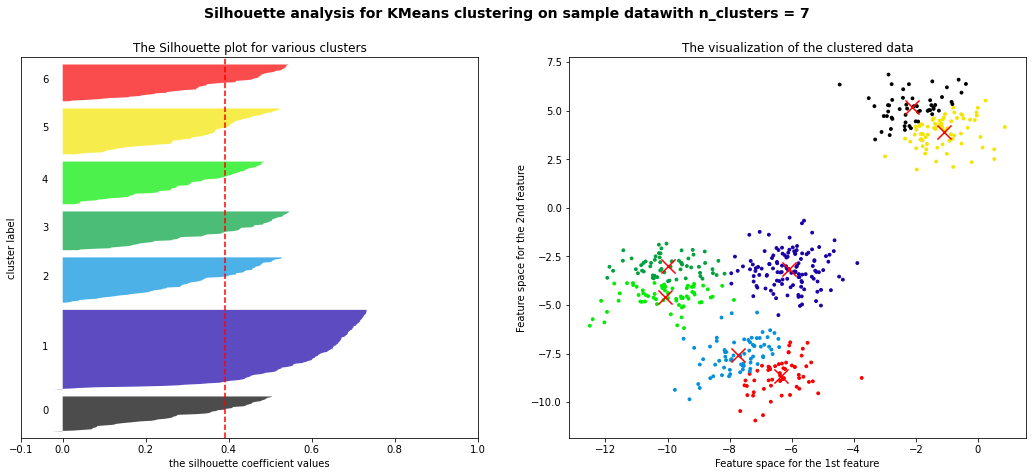

In [33]:
for n in [2,3,4,5,6,7]:
    n_clusters = n
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    # 第一个图：轮廓系数的图像，是由各个簇的轮廓系数组成的横向条形图
    # 横坐标：轮廓系数的数值   纵坐标：每一个样本，一维轮廓系数是对于每一个样本进行计算的

    # 轮廓系数是[-1,1]，希望是大于1   所以横坐标需要小一点
    ax1.set_xlim([-0.1,1])

    # 纵坐标：[0，X.shape[0]]
    # 不同簇之间有一定间隔
    ax1.set_ylim([0,X.shape[0]+(n_clusters+1)*10])

    #开始建模，调用聚类之后的标签
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    cluster_labels = clusterer.labels_

    # 计算轮廓系数
    silhouette_avg = silhouette_score(X,cluster_labels)
    print("For n_clusters =", n_clusters, 
         "the average silhouette score is: ", silhouette_avg)

    # 横坐标：每个样本点的轮廓系数
    sample_silhouette_values = silhouette_samples(X,cluster_labels)

    # 设定y轴上的初始值
    y_lower = 10

    # 对每一个簇进行循环
    for i in range(n_clusters):
        # 抽取标签相同的簇
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        # 排序
        ith_cluster_silhouette_values.sort()
        # 查看簇中有多少样本
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # y轴的上界
        y_upper = y_lower + size_cluster_i

        # 颜色：colormap
        # nipy_spectral([输入任意小数来代表颜色])
        color = cm.nipy_spectral(float(i)/n_clusters)

        # 开始填充子图1
        # fill_between 是一个让一个范围中的柱状图都统一颜色的函数
        ax1.fill_betweenx(np.arange(y_lower,y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )

        # 写每个簇的编号
        # text(要实现编号位置的横坐标，纵坐标，要显示的内容)
        ax1.text(-0.05
                ,y_lower+0.5*size_cluster_i
                ,str(i))

        # 下一个簇更新y_lower
        y_lower = y_upper + 10

    # 图1加标题
    ax1.set_title('The Silhouette plot for various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')

    # 把数据集的轮廓系数的均值以虚线放入图中
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    # y轴不显示刻度
    ax1.set_yticks([])
    # x轴刻度
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])


    #第二个图
    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)  # 同一个簇，同一种颜色

    ax2.scatter(X[:,0],X[:,1]
               ,marker='o'
               ,s=8
               ,c=colors
               )

    # 质心
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1]
               ,marker='x'
               ,c='red',alpha=1, s=200)

    # 图2加标题
    ax2.set_title('The visualization of the clustered data')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')

    # 整个图设置标题
    plt.suptitle(('Silhouette analysis for KMeans clustering on sample data'
                 "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    plt.show()

In [24]:
# n_clusters是2还是4？
# 需要业务判断

矢量量化：同样样本量，压缩样本上的信息量
KMeans多用于非结构化数据的矢量量化 - 图像，声音等
用质心的信息 约等于 整个簇中的点的信息

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin  # 对两个序列中的点进行距离匹配的函数
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle  # 打乱顺序

In [2]:
china = load_sample_image('china.jpg')

In [4]:
china.dtype

dtype('uint8')

In [5]:
china.shape
# 长度 * 宽度 * 像素（三个组成的一个颜色）

(427, 640, 3)

In [6]:
newimage = china.reshape((427*640,3))

In [7]:
newimage.shape

(273280, 3)

In [8]:
# 去重  表示有96615个不同的像素/颜色
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

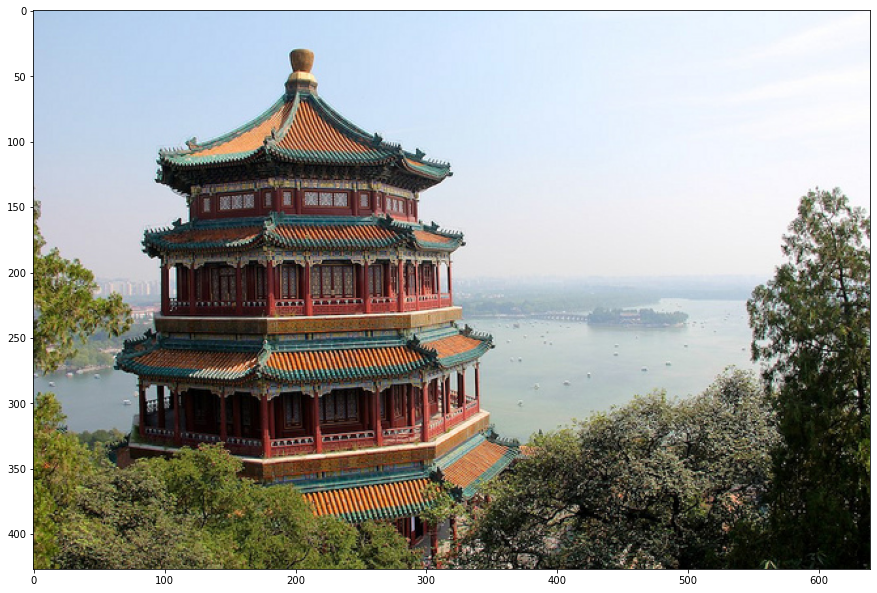

In [10]:
# 图片可视化
plt.figure(figsize=(15,15))
plt.imshow(china)  #imshow必须导入三维数组

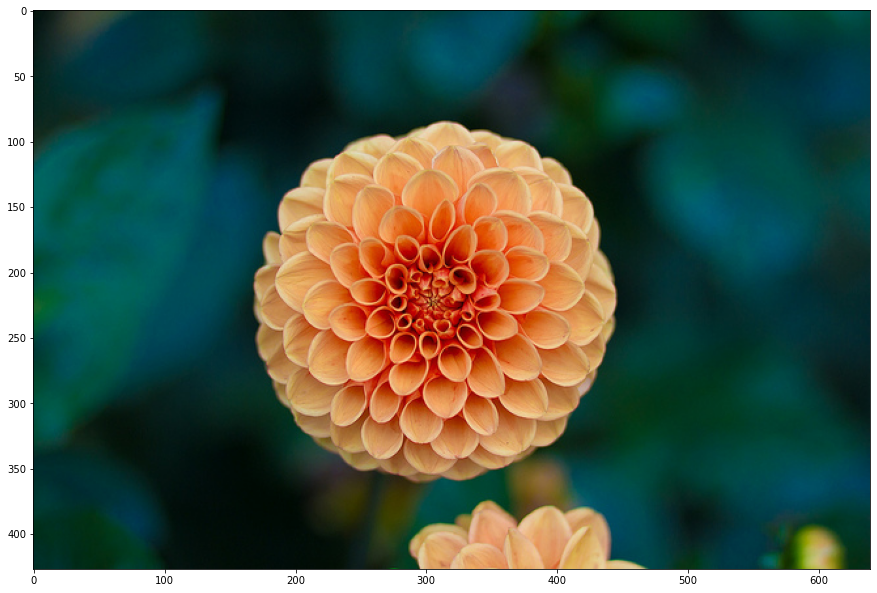

In [11]:
flower = load_sample_image('flower.jpg')
plt.figure(figsize=(15,15))
plt.imshow(flower)  #imshow必须导入三维数组

In [12]:
# 矢量量化
n_clusters = 64

# 归一化 - imshow在浮点数上表现优秀，所以归一化到【0,1】
china = np.array(china, dtype=np.float64)/china.max()

In [13]:
w, h, d = original_shape = tuple(china.shape)

In [16]:
assert d == 3, "Feature number is not 3"
# assert相当于raise error if not, 如果不为True，就要报错

3

In [17]:
#image变成二维数组，才可以被sklearn接受
image_array = np.reshape(china, (w*h,d))
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [18]:
image_array.shape

(273280, 3)

In [23]:
# KMeans建模
# 因为样本太多，所以使用切片求出质心
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(image_array_sample)
centers = kmeans.cluster_centers_

In [24]:
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [26]:
set(labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [29]:
# 用质心替换所有的样本
image_kmeans = image_array.copy()

In [30]:
image_kmeans

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [31]:
centers[labels[0]]

array([0.73524384, 0.82021116, 0.91925591])

In [32]:
# 质心替换原有的样本点 - labels里面的索引相对应
for i in range(w*h):
    image_kmeans[i] = centers[labels[i]]

In [34]:
# 查看新生成的样本点
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [36]:
# 恢复图片的结构
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

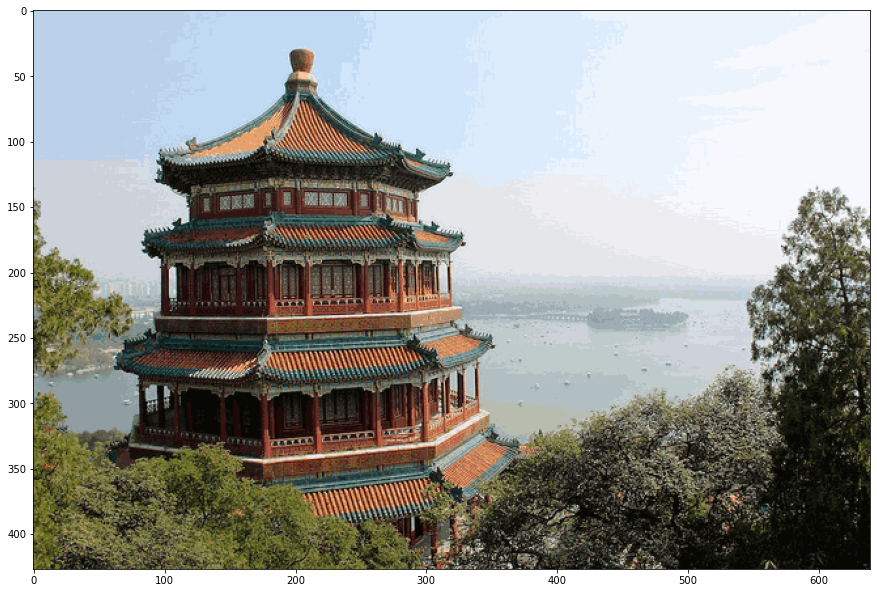

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(image_kmeans)

In [38]:
# 随机抽取64个质心
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
centroid_random.shape

(64, 3)

In [39]:
# 创造随机labels
labels_random = pairwise_distances_argmin(centroid_random, image_array, axis=0)
# 函数pairwise_distances_argmin(x1,x2,axis)
# 用来计算x2中每个样本点到x1中每个样本点的距离，并返回和x2相同形状的，x1对应的最近的样本点的索引

In [45]:
len(labels_random)

273280

In [43]:
image_random = image_array.copy()
# 质心替换样本
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
    
# 恢复图片的结构
image_random = image_random.reshape(w,h,d)

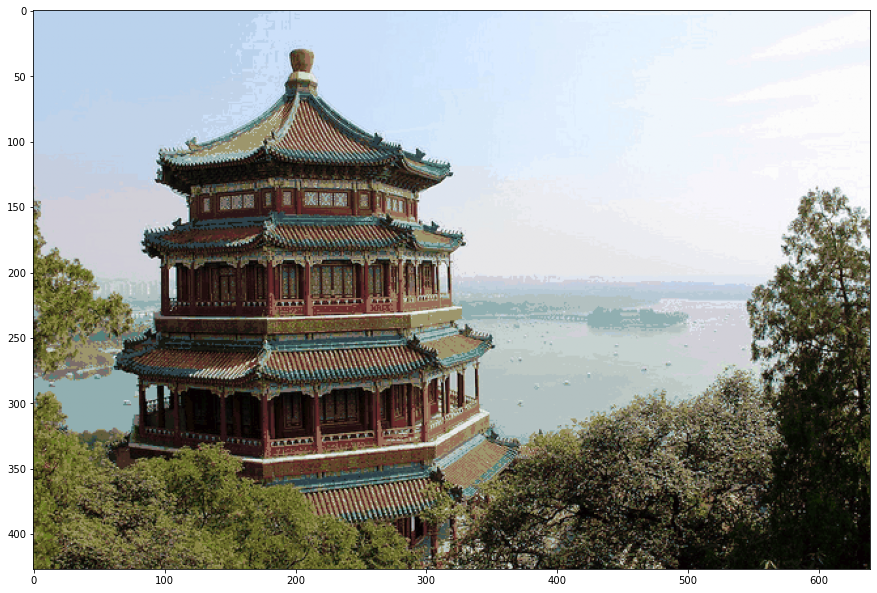

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(image_random)